In [1]:
# Import all the necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# magic Jupyter function that allows plots to be interactive.
%matplotlib notebook

In [2]:
#Criação dos exemplos/amostras
M = 1000

x1_treinamento = np.random.normal(0, 1, (M,1))
x2_treinamento = np.random.normal(10, 10, (M,1))

x1_validacao = np.random.normal(0, 1, (M,1))
x2_validacao = np.random.normal(10, 10, (M,1))

y_treinamento = x1_treinamento + x2_treinamento
y_validacao = x1_validacao + x2_validacao

In [3]:
#Gerar valores para os parâmetros a, para que seja plotada a superfície de erro e figura de contorno
N = 200
a1 = np.linspace(-12.0, 14.0, N)
a2 = np.linspace(-12.0, 14.0, N)

A1, A2 = np.meshgrid(a1, a2)

J = np.zeros((N,N))
for iter1 in range(0, N):
    for iter2 in range(0, N):
        yhat = A1[iter1][iter2]*x1_treinamento + A2[iter1][iter2]*x2_treinamento
        J[iter1][iter2] = (1/M)*np.sum( np.square(y_treinamento - yhat)  )

In [4]:
# Concatenate both column vectors.
X_treinamento = np.c_[x1_treinamento, x2_treinamento]

# Closed-form solution.
a_opt = np.linalg.pinv(np.transpose(X_treinamento).dot(X_treinamento)).dot(np.transpose(X_treinamento).dot(y_treinamento))
yhat = a_opt[0, 0]*x1_treinamento + a_opt[1, 0]*x2_treinamento
Joptimum = (1/M)*np.sum(np.power((y_treinamento - yhat), 2) )

In [5]:
#Implementação do algoritmo do batch

#Passo de aprendizagem
alpha = 0.004

#Número máximo de iterações
n_iterations = 2000

#Criação de vetor para armazenar e inicializar os parâmetros a
a = np.zeros((2,1))
a[0] = -20;
a[1] = -20;

a_hist = np.zeros((2, n_iterations+1))
a_hist[0, 0] = a[0]
a_hist[1, 0] = a[1]

#Criar vetor para armazenar o histórico dos valores de erro
Jgd = np.zeros(n_iterations+1)
Jgd[0] = (1/M)*sum(np.power(y_treinamento - X_treinamento.dot(a), 2))

#Inicialização de variáveis do loop
iteration = 0
error = 1
grad_hist = np.zeros((2, n_iterations))


#while iteration < n_iterations and error > 0.001:a
while iteration < n_iterations:
    gradients = -2/M * X_treinamento.T.dot(y_treinamento - X_treinamento.dot(a))
    
    grad_hist[0, iteration] = gradients[0]
    grad_hist[1, iteration] = gradients[1]
    
    a = a - alpha * gradients
    
    a_hist[0, iteration+1] = a[0]
    a_hist[1, iteration+1] = a[1]
    
    Jgd[iteration+1] = (1/M)*sum(np.power( (y_treinamento - X_treinamento.dot(a)) , 2))
    
    error = np.abs(Jgd[iteration+1] - Jgd[iteration])
    
    iteration = iteration + 1

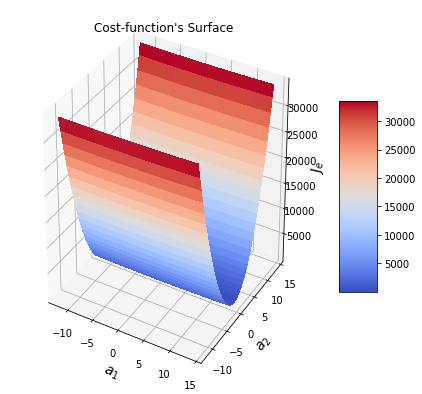

<Figure size 432x288 with 0 Axes>

In [6]:
#Superfície de erro

fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)

#Formatação do gráfico.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('$a_1$', fontsize=14)
ax.set_ylabel('$a_2$', fontsize=14)
ax.set_zlabel('$J_e$', fontsize=14);
plt.title('Cost-function\'s Surface')

#Figura
plt.show()

plt.savefig("error_surface_bgd.png", dpi=600)

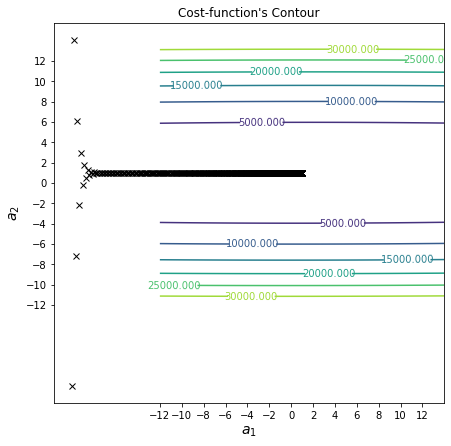

<Figure size 432x288 with 0 Axes>

In [7]:
#Curva de contorno da superfície de erro

fig = plt.figure(figsize=(7,7))
cp = plt.contour(A1, A2, J)

plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_1$', fontsize=14)
plt.ylabel('$a_2$', fontsize=14)
plt.title('Cost-function\'s Contour')
plt.plot(a_hist[0, 0:iteration], a_hist[1, 0:iteration], 'kx')
plt.xticks(np.arange(-12, 14, step=2.0))
plt.yticks(np.arange(-12, 14, step=2.0))
plt.show()

plt.savefig("error_contour_bgd.png", dpi=600)

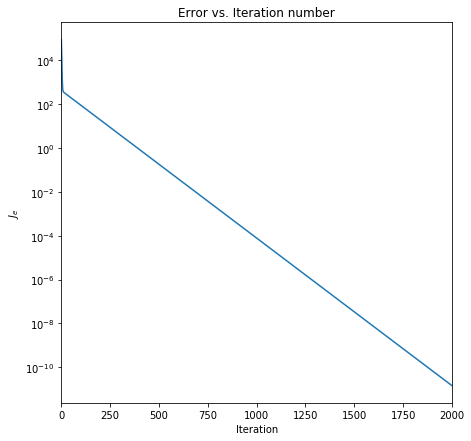

<Figure size 432x288 with 0 Axes>

In [8]:
#Erro vs. número de iterações

fig = plt.figure(figsize=(7,7))
plt.plot(np.arange(0, iteration), Jgd[0:iteration])
plt.xlim((0, iteration))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')
plt.show()

plt.savefig("error_vs_iteration_bgd.png", dpi=600)

In [27]:
#Escalonamento de features utilizando o método min-max
x1t_max = np.amax(x1_treinamento)
x1t_min = np.amin(x1_treinamento)
x2t_max = np.amax(x2_treinamento)
x2t_min = np.amin(x2_treinamento)

x1t_escalonado = (x1_treinamento - x1t_min)/(x1t_max - x1t_min)
x2t_escalonado = (x2_treinamento - x2t_min)/(x2t_max - x2t_min)
y_treinamento = x1t_escalonado + x2t_escalonado

#O conjunto de teste é escalonado utilizando os valores obtidos com o conjunto de treinamento 

x1v_escalonado = (x1_validacao - x1t_min)/(x1t_max - x1t_min)
x2v_escalonado = (x2_validacao - x2t_min)/(x2t_max - x2t_min)
y_validacao = x1v_escalonado + x2v_escalonado

In [28]:
#Gerar valores para os parâmetros a, para que seja plotada a superfície de erro e figura de contorno
N = 200
a1 = np.linspace(-12.0, 14.0, N)
a2 = np.linspace(-12.0, 14.0, N)

A1, A2 = np.meshgrid(a1, a2)

J = np.zeros((N,N))
for iter1 in range(0, N):
    for iter2 in range(0, N):
        yhat = A1[iter1][iter2]*x1t_escalonado + A2[iter1][iter2]*x2t_escalonado
        J[iter1][iter2] = (1/M)*np.sum( np.square(y_treinamento - yhat)  )

In [29]:
# Concatenate both column vectors.
Xt_escalonado = np.c_[x1t_escalonado, x2t_escalonado]

# Closed-form solution.
a_opt = np.linalg.pinv(np.transpose(Xt_escalonado).dot(Xt_escalonado)).dot(np.transpose(Xt_escalonado).dot(y_treinamento))
yhat = a_opt[0, 0]*x1t_escalonado + a_opt[1, 0]*x2t_escalonado
Joptimum = (1/M)*np.sum(np.power((y_treinamento - yhat), 2) )

In [30]:
#Implementação do algoritmo do batch

#Passo de aprendizagem
alpha = 0.06

#Número máximo de iterações
n_iterations = 2000

#Criação de vetor para armazenar e inicializar os parâmetros a
a = np.zeros((2,1))
a[0] = -20;
a[1] = -20;

a_hist = np.zeros((2, n_iterations+1))
a_hist[0, 0] = a[0]
a_hist[1, 0] = a[1]

#Criar vetor para armazenar o histórico dos valores de erro
Jgd = np.zeros(n_iterations+1)
Jgd[0] = (1/M)*sum(np.power(y_treinamento - Xt_escalonado.dot(a), 2))

#Inicialização de variáveis do loop
iteration = 0
error = 1
grad_hist = np.zeros((2, n_iterations))


#while iteration < n_iterations and error > 0.001:a
while iteration < n_iterations:
    gradients = -2/M * Xt_escalonado.T.dot(y_treinamento - Xt_escalonado.dot(a))
    
    grad_hist[0, iteration] = gradients[0]
    grad_hist[1, iteration] = gradients[1]
    
    a = a - alpha * gradients
    
    a_hist[0, iteration+1] = a[0]
    a_hist[1, iteration+1] = a[1]
    
    Jgd[iteration+1] = (1/M)*sum(np.power( (y_treinamento - Xt_escalonado.dot(a)) , 2))
    
    error = np.abs(Jgd[iteration+1] - Jgd[iteration])
    
    iteration = iteration + 1

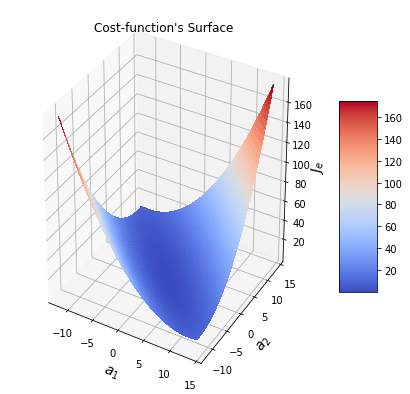

<Figure size 432x288 with 0 Axes>

In [31]:
#Superfície de erro com features escalonadas utilizando min-max

fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)

#Formatação do gráfico.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('$a_1$', fontsize=14)
ax.set_ylabel('$a_2$', fontsize=14)
ax.set_zlabel('$J_e$', fontsize=14);
plt.title('Cost-function\'s Surface')

#Figura
plt.show()

plt.savefig("error_surface_bgd.png", dpi=600)

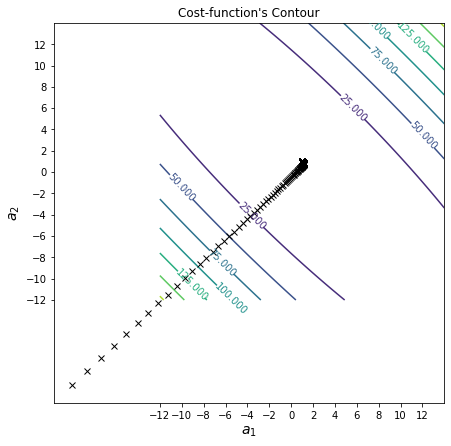

<Figure size 432x288 with 0 Axes>

In [32]:
fig = plt.figure(figsize=(7,7))
cp = plt.contour(A1, A2, J)

plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_1$', fontsize=14)
plt.ylabel('$a_2$', fontsize=14)
plt.title('Cost-function\'s Contour')
plt.plot(a_hist[0, 0:iteration], a_hist[1, 0:iteration], 'kx')
plt.xticks(np.arange(-12, 14, step=2.0))
plt.yticks(np.arange(-12, 14, step=2.0))
plt.show()

plt.savefig("error_contour_bgd.png", dpi=600)

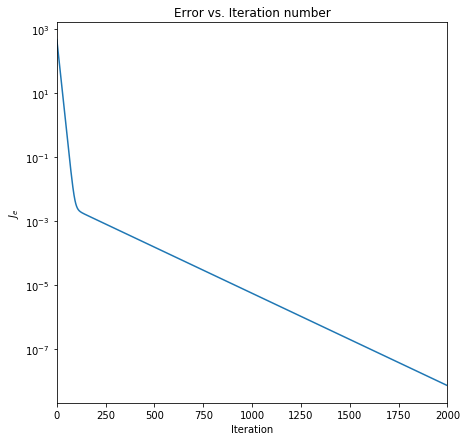

<Figure size 432x288 with 0 Axes>

In [33]:
#Erro vs. número de iterações

fig = plt.figure(figsize=(7,7))
plt.plot(np.arange(0, iteration), Jgd[0:iteration])
plt.xlim((0, iteration))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')
plt.show()

plt.savefig("error_vs_iteration_bgd.png", dpi=600)

In [34]:
#Escalonamento de features utilizando a padronização
x1t_padronizado = (x1_treinamento - np.mean(x1_treinamento)) / np.std(x1_treinamento)
x2t_padronizado = ((x2_treinamento - np.mean(x2_treinamento)) / np.std(x2_treinamento))

y_treinamento = x1t_padronizado + x2t_padronizado

#O conjunto de teste é escalonado utilizando os valores obtidos com o conjunto de treinamento 
x1v_padronizado = (x1_validacao - np.mean(x1_treinamento)) / np.std(x1_treinamento)
x2v_padronizado = ((x2_validacao - np.mean(x2_treinamento)) / np.std(x2_treinamento))

y_validacao = x1v_padronizado + x2v_padronizado

In [35]:
#Gerar valores para os parâmetros a, para que seja plotada a superfície de erro e figura de contorno
N = 200
a1 = np.linspace(-12.0, 14.0, N)
a2 = np.linspace(-12.0, 14.0, N)

A1, A2 = np.meshgrid(a1, a2)

J = np.zeros((N,N))
for iter1 in range(0, N):
    for iter2 in range(0, N):
        yhat = A1[iter1][iter2]*x1t_padronizado + A2[iter1][iter2]*x2t_padronizado
        J[iter1][iter2] = (1/M)*np.sum( np.square(y_treinamento - yhat)  )

In [36]:
# Concatenate both column vectors.
Xt_padronizado = np.c_[x1t_padronizado, x2t_padronizado]

# Closed-form solution.
a_opt = np.linalg.pinv(np.transpose(Xt_padronizado).dot(Xt_padronizado)).dot(np.transpose(Xt_padronizado).dot(y_treinamento))
yhat = a_opt[0, 0]*x1t_padronizado + a_opt[1, 0]*x2t_padronizado
Joptimum = (1/M)*np.sum(np.power((y_treinamento - yhat), 2) )

In [37]:
#Implementação do algoritmo do batch

#Passo de aprendizagem
alpha = 0.06

#Número máximo de iterações
n_iterations = 2000

#Criação de vetor para armazenar e inicializar os parâmetros a
a = np.zeros((2,1))
a[0] = -20;
a[1] = -20;

a_hist = np.zeros((2, n_iterations+1))
a_hist[0, 0] = a[0]
a_hist[1, 0] = a[1]

#Criar vetor para armazenar o histórico dos valores de erro
Jgd = np.zeros(n_iterations+1)
Jgd[0] = (1/M)*sum(np.power(y_treinamento - Xt_padronizado.dot(a), 2))

#Inicialização de variáveis do loop
iteration = 0
error = 1
grad_hist = np.zeros((2, n_iterations))


#while iteration < n_iterations and error > 0.001:a
while iteration < n_iterations:
    gradients = -2/M * Xt_padronizado.T.dot(y_treinamento - Xt_padronizado.dot(a))
    
    grad_hist[0, iteration] = gradients[0]
    grad_hist[1, iteration] = gradients[1]
    
    a = a - alpha * gradients
    
    a_hist[0, iteration+1] = a[0]
    a_hist[1, iteration+1] = a[1]
    
    Jgd[iteration+1] = (1/M)*sum(np.power( (y_treinamento - Xt_padronizado.dot(a)) , 2))
    
    error = np.abs(Jgd[iteration+1] - Jgd[iteration])
    
    iteration = iteration + 1

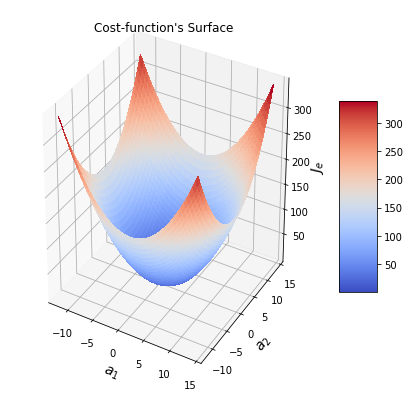

<Figure size 432x288 with 0 Axes>

In [38]:
#Superfície de erro com features escalonadas utilizando padronização

fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)

#Formatação do gráfico.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('$a_1$', fontsize=14)
ax.set_ylabel('$a_2$', fontsize=14)
ax.set_zlabel('$J_e$', fontsize=14);
plt.title('Cost-function\'s Surface')

#Figura
plt.show()

plt.savefig("error_surface_bgd.png", dpi=600)

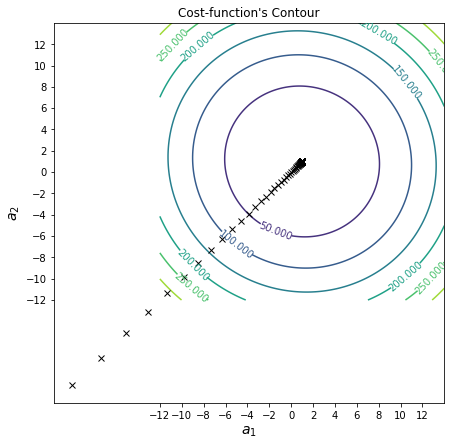

<Figure size 432x288 with 0 Axes>

In [39]:
fig = plt.figure(figsize=(7,7))
cp = plt.contour(A1, A2, J)

plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_1$', fontsize=14)
plt.ylabel('$a_2$', fontsize=14)
plt.title('Cost-function\'s Contour')
plt.plot(a_hist[0, 0:iteration], a_hist[1, 0:iteration], 'kx')
plt.xticks(np.arange(-12, 14, step=2.0))
plt.yticks(np.arange(-12, 14, step=2.0))
plt.show()

plt.savefig("error_contour_bgd.png", dpi=600)

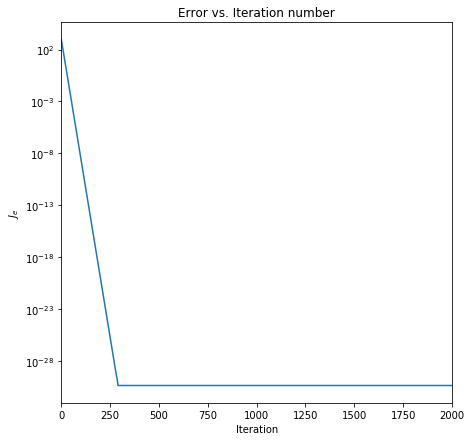

<Figure size 432x288 with 0 Axes>

In [40]:
#Erro vs. número de iterações

fig = plt.figure(figsize=(7,7))
plt.plot(np.arange(0, iteration), Jgd[0:iteration])
plt.xlim((0, iteration))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')
plt.show()

plt.savefig("error_vs_iteration_bgd.png", dpi=600)

In [41]:
#Escalonamento min-max aplicado aos labels
#Escalonamento de features utilizando o método min-max
yt_minmax = (y_treinamento - np.amin(y_treinamento)) / (np.amax(y_treinamento) - np.amin(y_treinamento))

yv_minmax = (y_validacao - np.amin(y_validacao)) / (np.amax(y_validacao) - np.amin(y_treinamento))

In [42]:
#Gerar valores para os parâmetros a, para que seja plotada a superfície de erro e figura de contorno
N = 200
a1 = np.linspace(-12.0, 14.0, N)
a2 = np.linspace(-12.0, 14.0, N)

A1, A2 = np.meshgrid(a1, a2)

J = np.zeros((N,N))
for iter1 in range(0, N):
    for iter2 in range(0, N):
        yhat = A1[iter1][iter2]*x1t_escalonado + A2[iter1][iter2]*x2t_escalonado
        J[iter1][iter2] = (1/M)*np.sum( np.square(yt_minmax - yhat)  )

In [43]:
# Concatenate both column vectors.
Xt_escalonado = np.c_[x1t_escalonado, x2t_escalonado]

# Closed-form solution.
a_opt = np.linalg.pinv(np.transpose(Xt_escalonado).dot(Xt_escalonado)).dot(np.transpose(Xt_escalonado).dot(yt_minmax))
yhat = a_opt[0, 0]*x1t_escalonado + a_opt[1, 0]*x2t_escalonado
Joptimum = (1/M)*np.sum(np.power((yt_minmax - yhat), 2) )

In [44]:
#Implementação do algoritmo do batch

#Passo de aprendizagem
alpha = 0.06

#Número máximo de iterações
n_iterations = 2000

#Criação de vetor para armazenar e inicializar os parâmetros a
a = np.zeros((2,1))
a[0] = -20;
a[1] = -20;

a_hist = np.zeros((2, n_iterations+1))
a_hist[0, 0] = a[0]
a_hist[1, 0] = a[1]

#Criar vetor para armazenar o histórico dos valores de erro
Jgd = np.zeros(n_iterations+1)
Jgd[0] = (1/M)*sum(np.power(yt_minmax - Xt_escalonado.dot(a), 2))

#Inicialização de variáveis do loop
iteration = 0
error = 1
grad_hist = np.zeros((2, n_iterations))


#while iteration < n_iterations and error > 0.001:a
while iteration < n_iterations:
    gradients = -2/M * Xt_escalonado.T.dot(yt_minmax - Xt_escalonado.dot(a))
    
    grad_hist[0, iteration] = gradients[0]
    grad_hist[1, iteration] = gradients[1]
    
    a = a - alpha * gradients
    
    a_hist[0, iteration+1] = a[0]
    a_hist[1, iteration+1] = a[1]
    
    Jgd[iteration+1] = (1/M)*sum(np.power( (yt_minmax - Xt_escalonado.dot(a)) , 2))
    
    error = np.abs(Jgd[iteration+1] - Jgd[iteration])
    
    iteration = iteration + 1

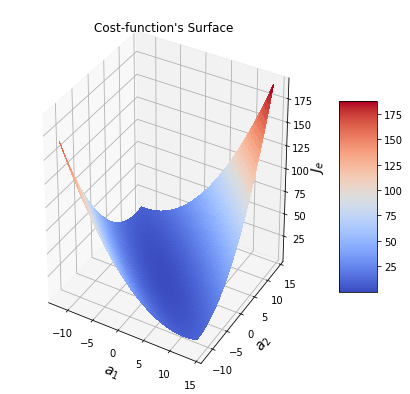

<Figure size 432x288 with 0 Axes>

In [45]:
#Superfície de erro com features e labels escalonados utilizando min-max

fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)

#Formatação do gráfico.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('$a_1$', fontsize=14)
ax.set_ylabel('$a_2$', fontsize=14)
ax.set_zlabel('$J_e$', fontsize=14);
plt.title('Cost-function\'s Surface')

#Figura
plt.show()

plt.savefig("error_surface_bgd.png", dpi=600)

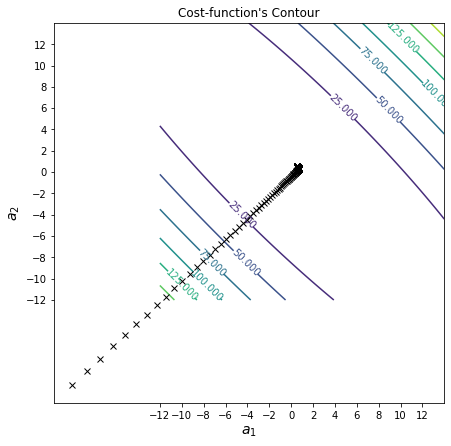

<Figure size 432x288 with 0 Axes>

In [46]:
fig = plt.figure(figsize=(7,7))
cp = plt.contour(A1, A2, J)

plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_1$', fontsize=14)
plt.ylabel('$a_2$', fontsize=14)
plt.title('Cost-function\'s Contour')
plt.plot(a_hist[0, 0:iteration], a_hist[1, 0:iteration], 'kx')
plt.xticks(np.arange(-12, 14, step=2.0))
plt.yticks(np.arange(-12, 14, step=2.0))
plt.show()

plt.savefig("error_contour_bgd.png", dpi=600)

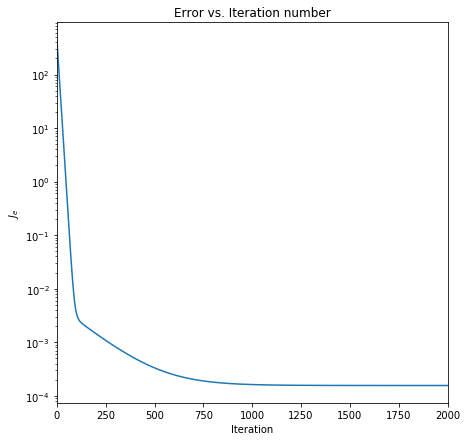

<Figure size 432x288 with 0 Axes>

In [47]:
#Erro vs. número de iterações

fig = plt.figure(figsize=(7,7))
plt.plot(np.arange(0, iteration), Jgd[0:iteration])
plt.xlim((0, iteration))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')
plt.show()

plt.savefig("error_vs_iteration_bgd.png", dpi=600)

In [48]:
#Escalonamento por padronização aplicado aos labels
yt_padronizacao = (y_treinamento - np.mean(y_treinamento)) / np.std(y_treinamento)

yv_padronizacao = (y_validacao - np.mean(y_validacao)) / np.std(y_validacao)

In [49]:
#Gerar valores para os parâmetros a, para que seja plotada a superfície de erro e figura de contorno
N = 200
a1 = np.linspace(-12.0, 14.0, N)
a2 = np.linspace(-12.0, 14.0, N)

A1, A2 = np.meshgrid(a1, a2)

J = np.zeros((N,N))
for iter1 in range(0, N):
    for iter2 in range(0, N):
        yhat = A1[iter1][iter2]*x1t_padronizado + A2[iter1][iter2]*x2t_padronizado
        J[iter1][iter2] = (1/M)*np.sum( np.square(yt_padronizacao - yhat)  )

In [50]:
# Concatenate both column vectors.
Xt_padronizado = np.c_[x1t_padronizado, x2t_padronizado]

# Closed-form solution.
a_opt = np.linalg.pinv(np.transpose(Xt_padronizado).dot(Xt_padronizado)).dot(np.transpose(Xt_padronizado).dot(yt_padronizacao))
yhat = a_opt[0, 0]*x1t_padronizado + a_opt[1, 0]*x2t_padronizado
Joptimum = (1/M)*np.sum(np.power((yt_padronizacao - yhat), 2) )

In [51]:
#Implementação do algoritmo do batch

#Passo de aprendizagem
alpha = 0.06

#Número máximo de iterações
n_iterations = 2000

#Criação de vetor para armazenar e inicializar os parâmetros a
a = np.zeros((2,1))
a[0] = -20;
a[1] = -20;

a_hist = np.zeros((2, n_iterations+1))
a_hist[0, 0] = a[0]
a_hist[1, 0] = a[1]

#Criar vetor para armazenar o histórico dos valores de erro
Jgd = np.zeros(n_iterations+1)
Jgd[0] = (1/M)*sum(np.power(yt_padronizacao - Xt_padronizado.dot(a), 2))

#Inicialização de variáveis do loop
iteration = 0
error = 1
grad_hist = np.zeros((2, n_iterations))


#while iteration < n_iterations and error > 0.001:a
while iteration < n_iterations:
    gradients = -2/M * Xt_padronizado.T.dot(yt_padronizacao - Xt_padronizado.dot(a))
    
    grad_hist[0, iteration] = gradients[0]
    grad_hist[1, iteration] = gradients[1]
    
    a = a - alpha * gradients
    
    a_hist[0, iteration+1] = a[0]
    a_hist[1, iteration+1] = a[1]
    
    Jgd[iteration+1] = (1/M)*sum(np.power( (yt_padronizacao - Xt_padronizado.dot(a)) , 2))
    
    error = np.abs(Jgd[iteration+1] - Jgd[iteration])
    
    iteration = iteration + 1

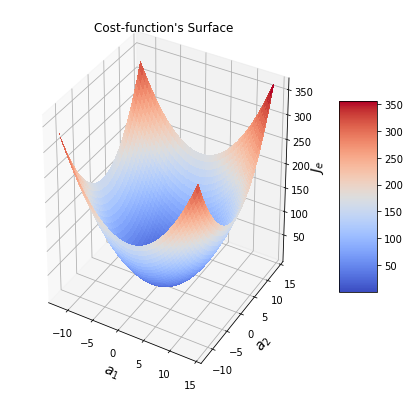

<Figure size 432x288 with 0 Axes>

In [53]:
#Superfície de erro com features e labels escalonados utilizando padronização

fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)

#Formatação do gráfico.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('$a_1$', fontsize=14)
ax.set_ylabel('$a_2$', fontsize=14)
ax.set_zlabel('$J_e$', fontsize=14);
plt.title('Cost-function\'s Surface')

#Figura
plt.show()

plt.savefig("error_surface_bgd.png", dpi=600)

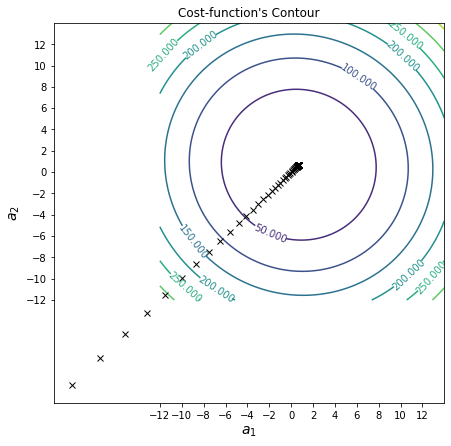

<Figure size 432x288 with 0 Axes>

In [54]:
fig = plt.figure(figsize=(7,7))
cp = plt.contour(A1, A2, J)

plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_1$', fontsize=14)
plt.ylabel('$a_2$', fontsize=14)
plt.title('Cost-function\'s Contour')
plt.plot(a_hist[0, 0:iteration], a_hist[1, 0:iteration], 'kx')
plt.xticks(np.arange(-12, 14, step=2.0))
plt.yticks(np.arange(-12, 14, step=2.0))
plt.show()

plt.savefig("error_contour_bgd.png", dpi=600)

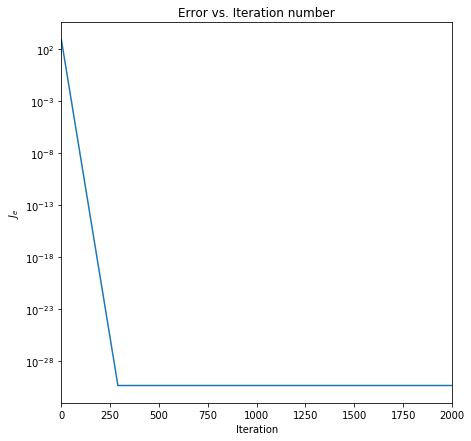

<Figure size 432x288 with 0 Axes>

In [55]:
#Erro vs. número de iterações

fig = plt.figure(figsize=(7,7))
plt.plot(np.arange(0, iteration), Jgd[0:iteration])
plt.xlim((0, iteration))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')
plt.show()

plt.savefig("error_vs_iteration_bgd.png", dpi=600)

In [ ]:
'''
Pode-se concluir que o escalonamento de features é bastante útil ao algoritmo em sua convergência. Na utilização
de features não escalonadas, a superfície de erro nitidamente não apresenta o formato adequado. Essa inadequação,
leva o algoritmo a não convergir adequadamente, podendo até realmente não convergir (considerando superfícies mais
'irregulares'), pois conforme apresentado em aula, features de maiores valores possuem maior influência no erro 
encontrado. Além disso, ao não utilizar features escalonadas, o número de iterações necessárias para uma redução
significativa do valor do erro é maior.

O escalonamento de labels para os dois casos de escalonamento apresentados, contribuiu para que o valor erro calcula
-do fosse otimizado, ou seja, ao escalonar as features para os dois exemplos, o valor de erro foi reduzido (ainda ma
-is).

Sobre as superfícies de erro, ao aplicar o escalonamento min-máx, houve melhora significativa, no entanto, a superfí
-cie não apresentou a forma 'ótima'. No entanto, ao aplicar a padronização, observou-se que a superfície ilustrada
possuia a forma 'ótima', apresentando, neste caso, melhor desempenho. Este efeito pode também ser observado nas figu
-ras de contorno.

'''